# Stabel Diffusion (2022)

## Idea

**Main Idea**

Stable diffusion models are a type of generative models that create high-quality data by gradually refining noise into structured patterns, typically using a process that reverses diffusion, which is the gradual mixing of substances

**Pros**

1. **Detail Preservation:** Effective at maintaining details in generated images or patterns
2. **Control:** Allow more control over the generation process through conditioning
3. **Stability:** Tend to be more stable during training compared to traditional GANs

**Cons**

- **Complexity:** The underlying mechanisms can be complex and computationally intensive
- **Hyperparameter Sensitivity:** May require careful tuning of hyperparameters for optimal performance

**Creator**

- https://github.com/Stability-AI/generative-models

![https://www.linkedin.com/pulse/diffusion-model-generative-image-synthesis-yogeshwaran-singarasu-jgo4c/](content/img4001_SDidea.png "SDidea")

### Forward Diffusion Process


- A controlled, fixed process
- Self-determined

![https://theaisummer.com/diffusion-models/](content/img4002_Forward.png "Forward")

$$ q(x_t | x_{t-1}) = \mathcal{N}(x_t; \mu_t = \sqrt{1 - \beta_t} x_{t-1}, \Sigma_t = \beta_t I) $$

- $x_t$ — state of the image at time step $t$
- $x_{t-1}$ — state of the image at the previous step $t-1$
- $\beta_t$ — diffusion coefficient at step $t$
- $\mu_t$ —  mean of the normal distribution
- $\Sigma_t$ —  covariance matrix of the normal distribution, where $I$ represents the identity matrix

![https://yang-song.net/blog/2021/score/](content/img4003_FNoising.gif "FNoising")

- $x_t = \sqrt{\alpha_t} x_{t-1} + \sqrt{1 - \alpha_t} \varepsilon_t, \quad \varepsilon_t \sim \mathcal{N}(0, I), \quad \alpha_t = 1 - \beta_t $
- $x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1 - \bar{\alpha}_t} \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, I), \quad \bar{\alpha}_t = \prod_{i=1}^t \alpha_i $
- $x_{t-1} = \frac{1}{\sqrt{\bar{\alpha}_t}} \left( x_t - \frac{1 - \alpha_t}{\sqrt{1 - \bar{\alpha}_t}} \varepsilon \right) + \tilde{\beta}_t z, \quad z \sim \mathcal{N}(0, I), \quad \tilde{\beta}_t = \frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \beta_t$
- $\varepsilon$ - noise vector



### Reverse Diffusion Process

- Trained by the model

![https://theaisummer.com/diffusion-models/](content/img4004_Reverse.png "Reverse")

![https://yang-song.net/blog/2021/score/](content/img4005_RNoising.gif "RNoising")

- $\hat{x}_{t-1} = \frac{1}{\sqrt{\bar{\alpha}_t}} \left( x_t - \frac{1-\alpha_t}{\sqrt{1-\bar{\alpha}_t}} \varepsilon_{\theta}(x_t, t) \right) + \sigma_t z, \quad z \sim \mathcal{N}(0, I), \quad \sigma_t = \text{const}$
    - Here $\hat{\mathbf{x}}_{t-1}$ - predicted image at step $t-1$
    - $\varepsilon_{\theta}$ is the vector of predicted noise
    - $\sigma_t z$ - is a regularization element, for better training of the network

**Loss (MSE)**
- $L_t = \|\mathbf{x}_{t-1} - \hat{\mathbf{x}}_{t-1}\|_2^2 \propto \|\boldsymbol{\varepsilon} - \boldsymbol{\varepsilon}_{\theta}(\mathbf{x}_t, t)\|_2^2 \rightarrow \min_{\theta}$
    - $\boldsymbol{\varepsilon}_{\theta}(\mathbf{x}_t, t)\$ - image, time 

![https://arxiv.org/pdf/2006.11239.pdf](content/img4006_Algo.png "Algo")

We predict epsilon for the image and predict the conditional distribution, given that we already know the image \(X_t\). \
It can't be done analytically, i.e., predicting the parameters of this distribution (for example, using the maximum likelihood method) is difficult because:

- The distribution is conditional.
- It has high dimensionality.

Therefore, neural networks are used—they solve the likelihood optimization prb\
lem. Moreover, we need to do this multiple times, calculating the conditional distribution, the conditionally conditional distribution etc.

In [20]:
# Hyperparameters

- $ T = 1000 $
- $ \beta_1 < \beta_2 < \cdots < \beta_t < \cdots < \beta_T $
- $ \beta_1 = 0.0001, \beta_T = 0.02 $
- $ \sigma_t^2 = \beta_t \quad \text {или} \quad \sigma_t^2 = \tilde{\beta}_t $

In [17]:
# Conditional Diffusion Models (with text)

**Loss (MSE)**
- $L_t = \|\mathbf{x}_{t-1} - \hat{\mathbf{x}}_{t-1}\|_2^2 \propto \|\boldsymbol{\varepsilon} - \boldsymbol{\varepsilon}_{\theta}(\mathbf{x}_t, t)\|_2^2 \rightarrow \min_{\theta}$
    - $\boldsymbol{\varepsilon}_{\theta}(\mathbf{x}_t, t)\$ - картинка, время, условие (эмбеддинг из трансформера из текста)

## SD Implementation

![https://generativeai.pub/denoising-diffusion-probabilistic-models-from-scratch-728df8228565](content/img4007_Imp1.webp "Imp1")

![https://medium.com/augmented-startups/stable-diffusion-the-engine-powering-ai-influencer-stardom-ee64b4f76101](content/img4008_Imp2.png "Imp2")

- VAE
- CLIP
- UNET

### sd 2.1 txt2img
- https://huggingface.co/stabilityai/stable-diffusion-2-1-base

In [1]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

DEVICE = 'cuda:0'
CACHE_DIR = '/home/a.lugovoi/Git/rnd-tasks/generative-ai-research/cache'

/home/a.lugovoi/.conda/envs/a.lugovoi.py310/lib/python3.10/site-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
2024-04-17 15:59:05.641555: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 15:59:05.643433: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 15:59:05.680846: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations,

In [2]:
model_id = "stabilityai/stable-diffusion-2-1-base"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler", cache_dir=CACHE_DIR)
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, cache_dir=CACHE_DIR)
pipe = pipe.to(DEVICE)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
%%time

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 3.32 s, sys: 0 ns, total: 3.32 s
Wall time: 4.41 s


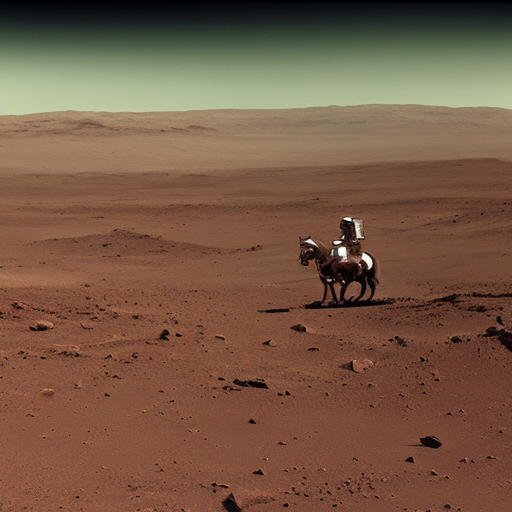

In [9]:
image

In [11]:
print(image.size)

(512, 512)


### xl txt2img

- https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

In [6]:
from diffusers import DiffusionPipeline
import torch

DEVICE = 'cuda:0'
CACHE_DIR = '/home/a.lugovoi/Git/rnd-tasks/generative-ai-research/cache'

In [7]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float16,
    use_safetensors=True, 
    variant="fp16",
    cache_dir=CACHE_DIR
)
pipe = pipe.to(DEVICE)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
%%time

prompt = "An astronaut riding a green horse, 2k, hight quality"
nergative_prompt = 'dark, noise, blur, low qualiry'

images = pipe(
    prompt=prompt,
    nergative_prompt=nergative_prompt,
    num_inference_steps=100,
    guidance_scale=12,
    eta=0.0,
    generator=torch.Generator(DEVICE).manual_seed(10),
    num_images_per_prompt =1
)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 21.8 s, sys: 2.62 s, total: 24.4 s
Wall time: 25.4 s


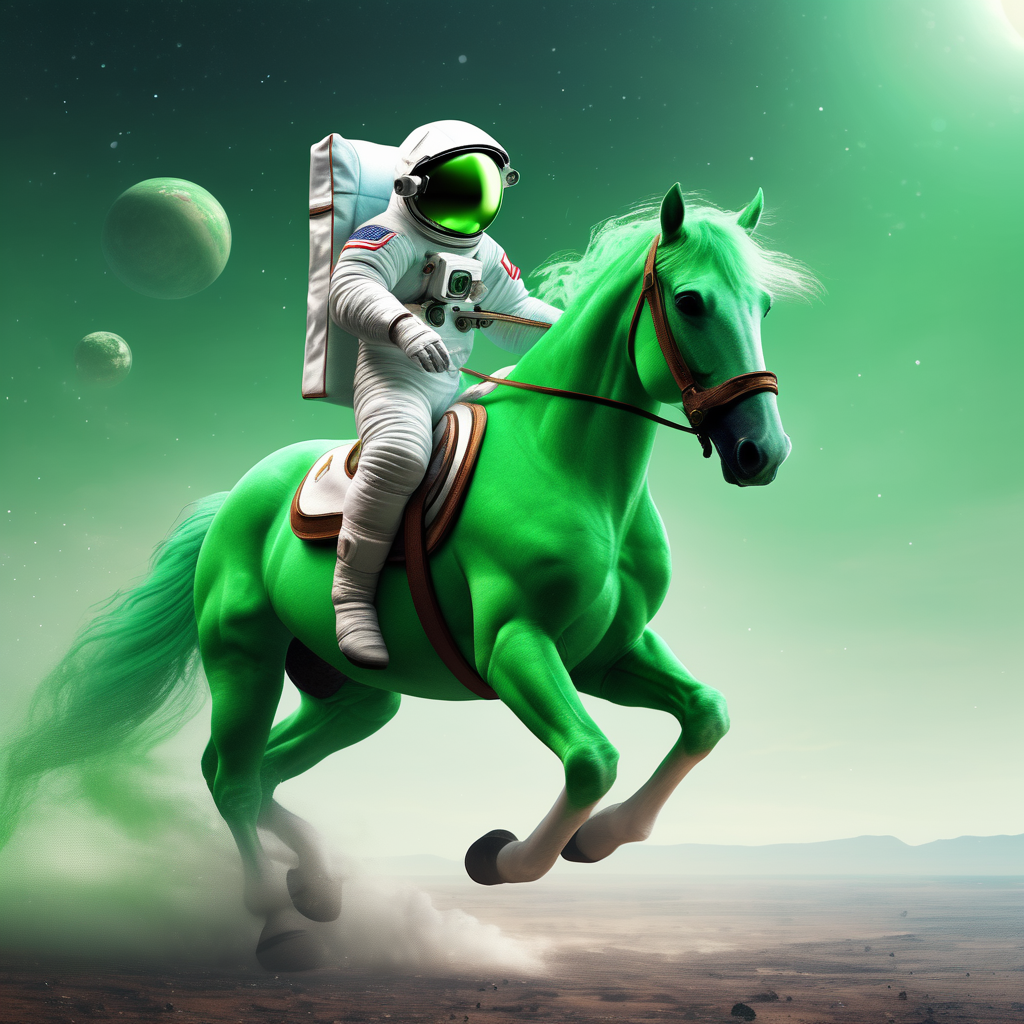

In [9]:
images.images[0]

In [10]:
images.images[0].size

(1024, 1024)

In [11]:
init_image = images.images[0]

### xl img2img

In [12]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid
import torch

DEVICE = 'cuda:0'
CACHE_DIR = '/home/a.lugovoi/Git/rnd-tasks/generative-ai-research/cache'

In [13]:
pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float16, 
    variant="fp16", 
    use_safetensors=True,
    cache_dir=CACHE_DIR
).to(DEVICE)

pipeline = AutoPipelineForImage2Image.from_pipe(pipeline_text2image, cache_dir=CACHE_DIR).to(DEVICE)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
%%time

prompt = "An astronaut riding a beown bear, 2k, hight quality"
nergative_prompt = 'dark, noise, blur, low qualiry'

image = pipeline(
    prompt,
    nergative_prompt=nergative_prompt,
    image=init_image, 
    strength=0.8, 
    num_inference_steps=100,
    guidance_scale=12,
    eta=0.0,
    generator=torch.Generator(DEVICE).manual_seed(10),
    num_images_per_prompt=1
)

  0%|          | 0/80 [00:00<?, ?it/s]

CPU times: user 17.9 s, sys: 2.03 s, total: 19.9 s
Wall time: 19.1 s


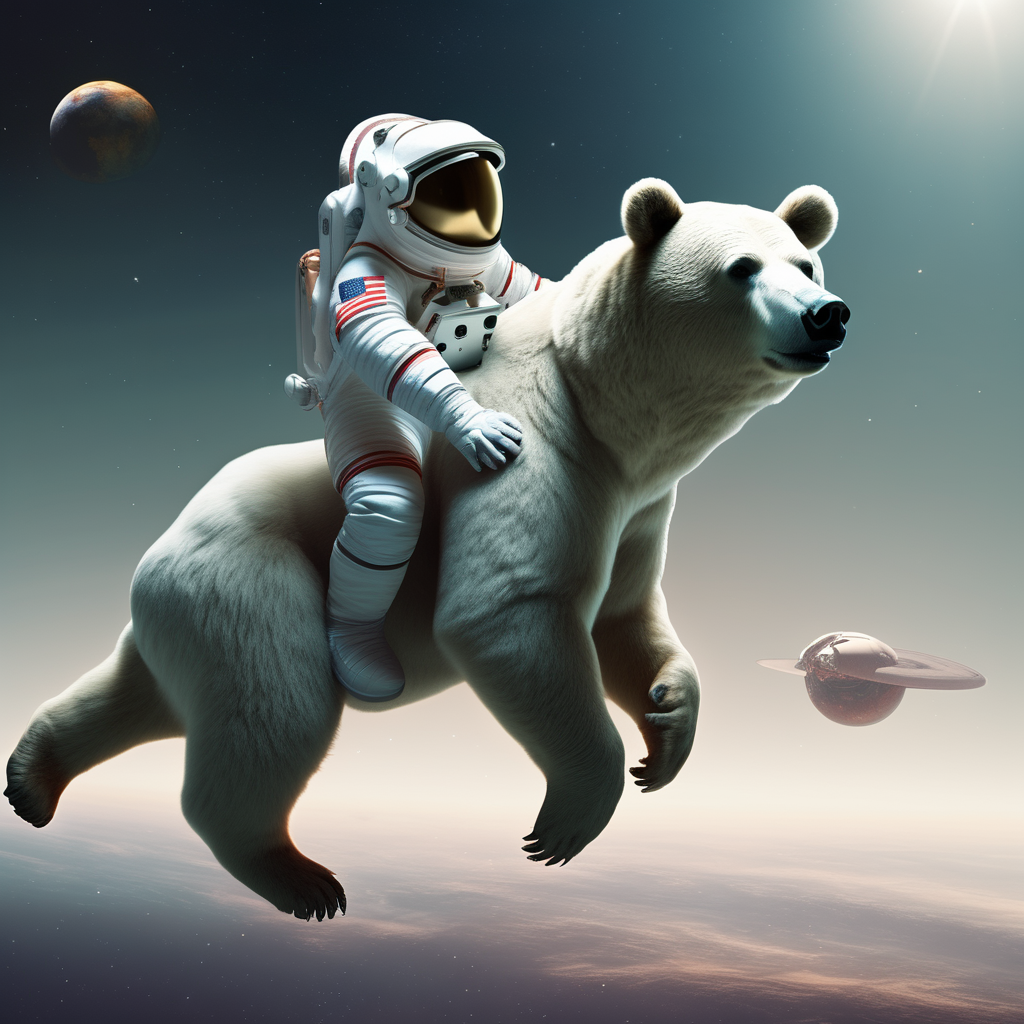

In [19]:
image.images[0]

In [ ]:
# img2img controlnet
# img2img inpaint
# https://huggingface.co/docs/diffusers/en/using-diffusers/sdxl

In [ ]:
# finetune stable diffusion
# - https://habr.com/ru/companies/vk/articles/749136/
# - https://habr.com/ru/companies/odnoklassniki/articles/773578/

# - dreambooth
# - lora
# - textual inversion
# - encoder for tuning

# Comparison

![https://questforai.wordpress.com/category/deeplearning/](content/img4009_Comp1.png "Comp1")

![https://lilianweng.github.io/posts/2021-07-11-diffusion-models/](content/img4010_Comp2.png "Comp2")

| Год  | Технология              | Описание                    |
|------|-------------------------|-----------------------------|
| 2013 | VAE (Variational Autoencoders) | автоэнкодеры             |
| 2014 | GAN (Generative Adversarial Networks) | генератор + дискриминатор |
| 2015 | Flow-based models       | обратимые преобразования    |
| ~2019 | Diffusion models        | диффузионный процесс        |


# Links

- https://www.youtube.com/watch?v=z7QH-WWHmfE
- https://theaisummer.com/diffusion-models/

**Finetune**

- https://habr.com/ru/companies/odnoklassniki/articles/773578/
- https://habr.com/ru/companies/vk/articles/749136/

**Evaluation**

- https://huggingface.co/docs/diffusers/en/conceptual/evaluation

# END

In [ ]:
# img_path = 'img2.jpg'
# img_pil = Image.open(img_path)
# img_pil = img_pil.convert('RGB')

# forward_diffusion_process(img_pil, steps=4, beta=0.25)